    pip install wordcloud

github: https://github.com/amueller/word_cloud

In [1]:
import sys
sys.path.append('/mnt/lovit/git/kr-wordrank/')

with open('/mnt/lovit/git/kr-wordrank/data/134963_norm.txt', encoding='utf-8') as f:
    texts = [doc.split('\t')[0] for doc in f]

In [2]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 15097
done = 10 Early stopped.


In [3]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      영화:	229.7889
     관람객:	112.3404
      너무:	78.4055
      음악:	37.6247
      정말:	37.2504
     마지막:	34.9952
      최고:	22.4425
      사랑:	21.1355
     뮤지컬:	20.7357
      꿈을:	19.5282
     여운이:	19.4032
      보고:	19.4005
      아름:	18.6495
      진짜:	18.5599
      영상:	18.1099
      좋았:	17.8625
      노래:	16.9019
     스토리:	16.2600
      좋은:	15.4661
      그냥:	15.2136
      현실:	15.0772
      생각:	14.6264
      인생:	14.2642
      좋고:	13.9971
      지루:	13.8732
      다시:	13.7812
      감동:	13.4817
      느낌:	12.3127
      ㅠㅠ:	12.1447
      좋아:	11.9586


In [15]:
keywords.pop('영화')
keywords.pop('관람객')
keywords.pop('너무')
keywords.pop('정말')

37.250420423680836

In [4]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'


    width : int (default=400)
        Width of the canvas.
    height : int (default=200)
        Height of the canvas.

In [5]:
import wordcloud
print(wordcloud.__version__)

1.4.1


In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS # not to use. 

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)
wordcloud = wordcloud.generate_from_frequencies(keywords)

array 가 overriding 되어 있어서 image 로 넣을 수 있음. 

    def __array__(self):
        """Convert to numpy array.
        Returns
        -------
        image : nd-array size (width, height, 3)
            Word cloud image as numpy matrix.
        """
        return self.to_array()

    def to_array(self):
        """Convert to numpy array.
        Returns
        -------
        image : nd-array size (width, height, 3)
            Word cloud image as numpy matrix.
        """
        return np.array(self.to_image())

In [17]:
array = wordcloud.to_array()
type(array)

numpy.ndarray

In [18]:
array.shape

(800, 800, 3)

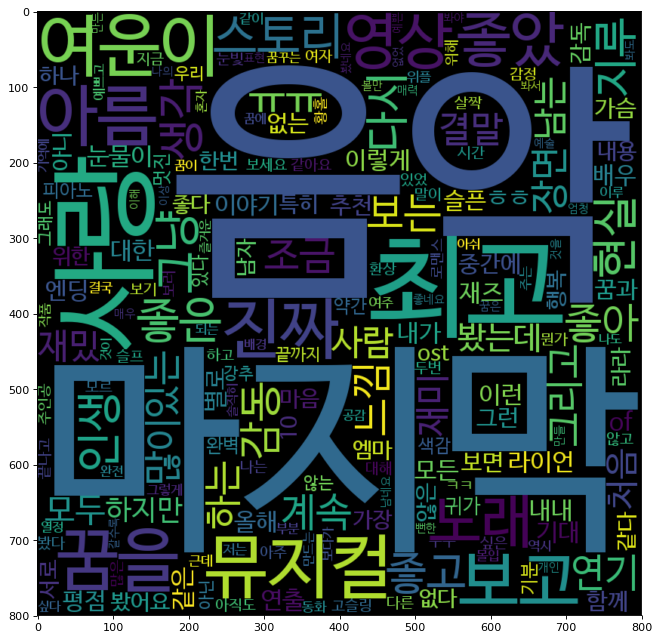

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(array, interpolation="bilinear")
# plt.axis("off")
plt.show()

fig.savefig('wordcloud_without_axisoff.png')

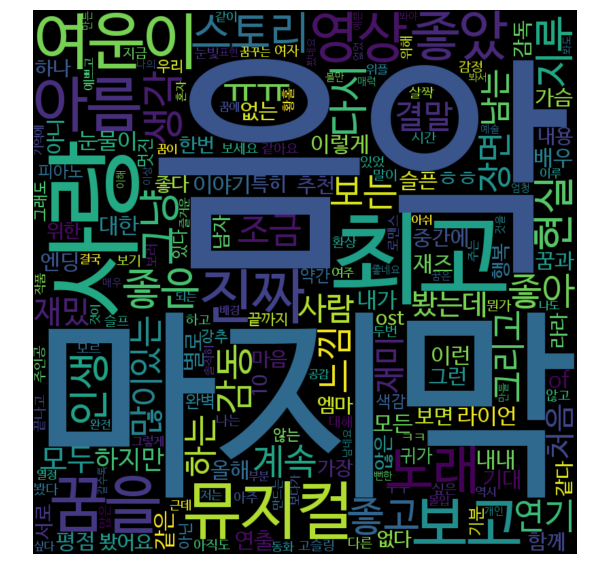

In [20]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

fig.savefig('wordcloud_with_axisoff.png')

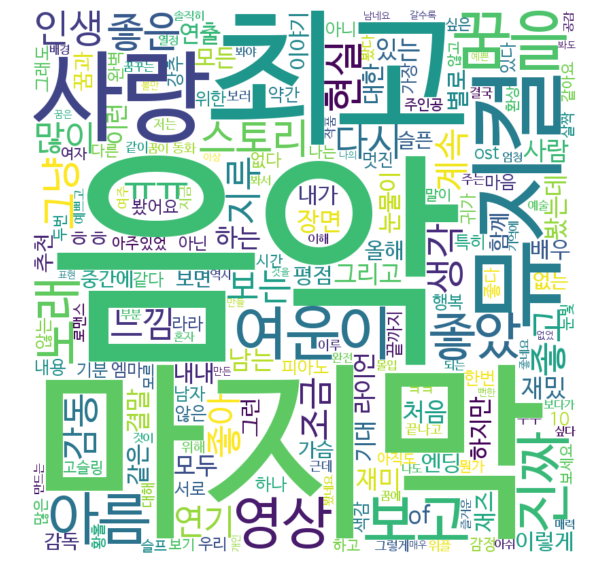

In [21]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies(keywords)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

fig.savefig('wordcloud_background_white.png')

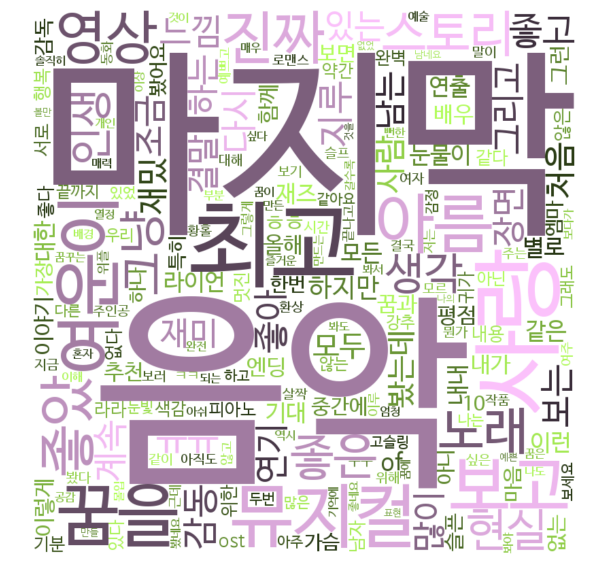

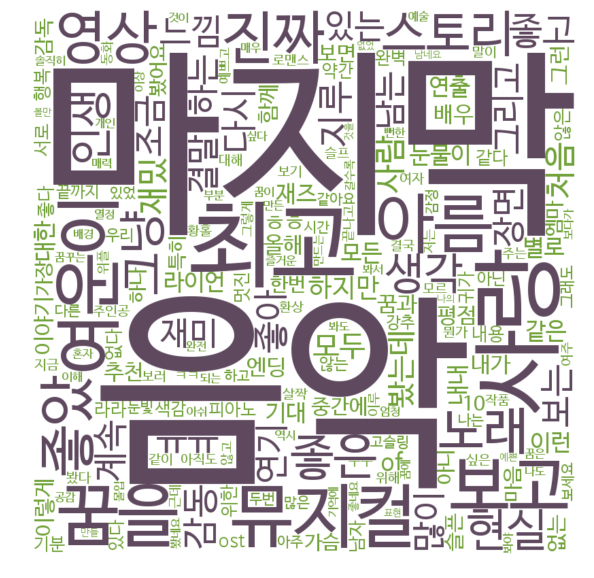

In [22]:
from wordcloud import get_single_color_func


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

color_to_words = {
    '#5f495f': list(filter(lambda x:keywords[x] > 10, keywords)),
    '#72a23a': list(filter(lambda x:keywords[x] <= 10, keywords))
}

default_color = 'grey'
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies(keywords)
wordcloud.recolor(color_func=grouped_color_func)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_groupcolor_next.png')

simple_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=simple_color_func)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_groupcolor.png')

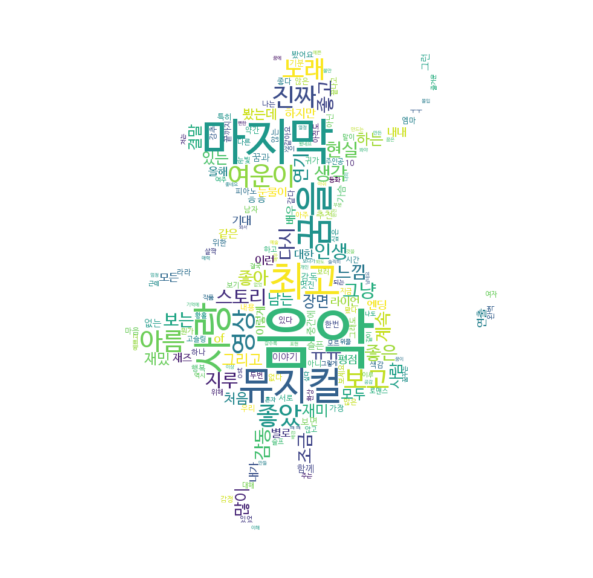

In [23]:
from PIL import Image
import numpy as np

alice_mask = np.array(Image.open("alice_mask.png"))

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
)

wordcloud = wordcloud.generate_from_frequencies(keywords)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_alice_mask.png')

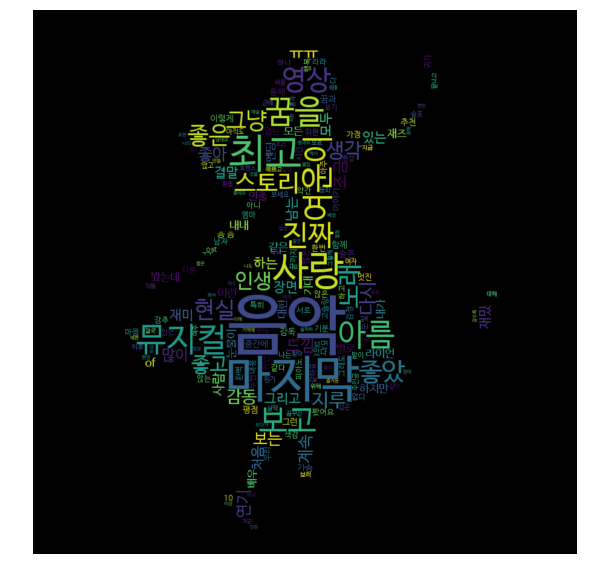

In [24]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    mask = alice_mask
)

wordcloud = wordcloud.generate_from_frequencies(keywords)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_alice_mask_wo_whitebackground.png')

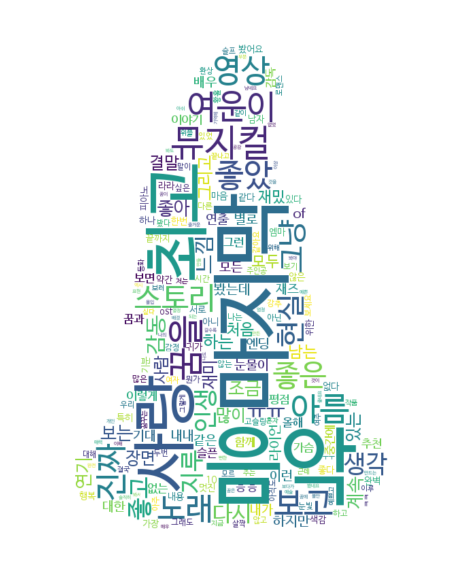

In [25]:
alice_color = np.array(Image.open("alice_color.png"))

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_color
)

wordcloud = wordcloud.generate_from_frequencies(keywords)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_alice_image.png')

https://movie-phinf.pstatic.net/20161101_284/14779623657454Yd9v_JPEG/movie_image.jpg?type=m886_590_2

![](https://movie-phinf.pstatic.net/20161101_284/14779623657454Yd9v_JPEG/movie_image.jpg?type=m886_590_2)

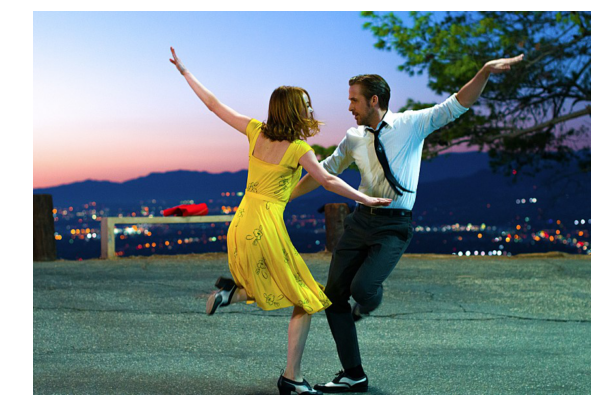

In [26]:
lalaland_color = np.array(Image.open("lalaland.jpg"))

fig = plt.figure(figsize=(10, 10))
plt.imshow(lalaland_color, interpolation="bilinear")
plt.axis("off")
plt.show()
# fig.savefig('wordcloud_lalaland_image.png')

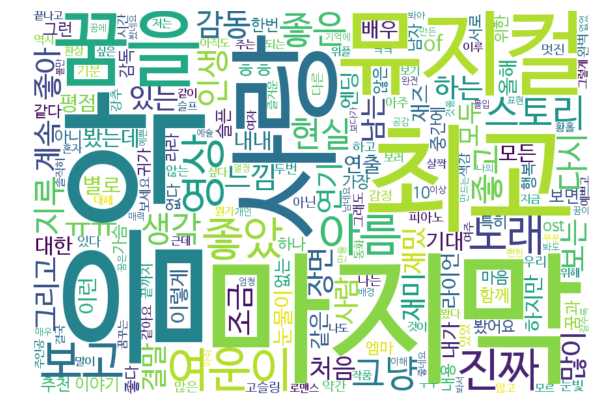

In [27]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = lalaland_color
)

wordcloud = wordcloud.generate_from_frequencies(keywords)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_lalaland_image.png')

In [28]:
import wordcloud
print(wordcloud.__version__)

1.4.1


The ratio of times to try horizontal fitting as opposed to vertical. If prefer_horizontal < 1, the algorithm will try rotating the word if it doesn’t fit. (There is currently no built-in way to get only vertical words.)

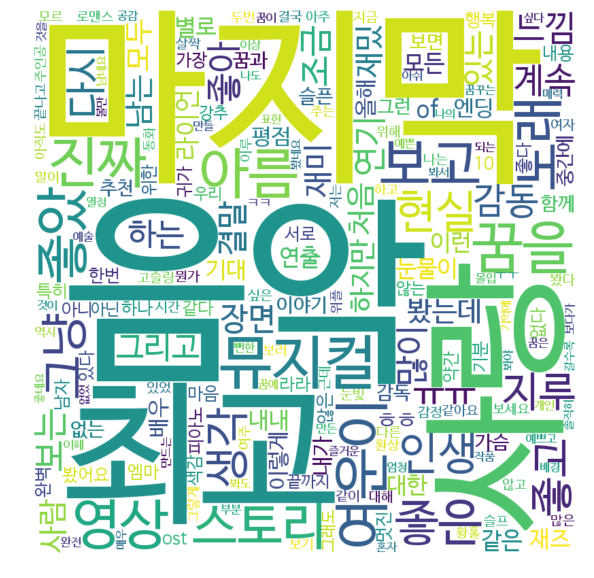

In [29]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    prefer_horizontal = 0.9999, # horizontal preference
    min_font_size = 10 # min font size
)

wordcloud = wordcloud.generate_from_frequencies(keywords)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_lalaland_image_horizontal.png')